In [399]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import random
import copy

In [400]:
def load_images(path,fileStore):
    Img_List = []
    for file_instance in fileStore:
        img = cv2.imread(path+'/'+file_instance)
        adjusted = cv2.resize(img,(32,32))
        (b,g,r) = cv2.split(adjusted)
        img = cv2.merge([b,g,r])
        Img_List.append(img)
    return Img_List

In [401]:
yes=os.listdir('./data/yes')
no=os.listdir('./data/no')

In [402]:
imgList = np.concatenate([yes,no])
class_no = np.full(len(no),0)
class_yes = np.full(len(yes),1)
classList = np.concatenate([class_yes,class_no])

In [403]:
imgBuffer = []
imgBuffer.extend(load_images('./data/yes',yes))
imgBuffer.extend(load_images('./data/no',no))

In [404]:
images = np.squeeze(imgBuffer)

In [405]:
indices = [i for i in range(0,len(classList))]

In [406]:
random.shuffle(indices)

In [407]:
updated_images = []
updated_classList = []
for i in indices:
    updated_images.append(images[i])
    updated_classList.append(classList[i])
images = np.array(updated_images,dtype=np.float32)
classList = np.array(updated_classList,dtype=np.float32)

In [408]:
images = images.astype('float32')
images = images/255

In [409]:
(train_x,train_y),(test_x,test_y) = (images[:190],classList[:190]),(images[190:],classList[190:])
(x_valid , y_valid) = (test_x[:63], test_y[:63])

In [410]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [411]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [412]:
model.fit(train_x,
         train_y,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 1s 347ms/step - loss: 0.8688 - acc: 0.4105 - val_loss: 0.6228 - val_acc: 0.7302
Epoch 2/150
2/2 [==============================] - 0s 199ms/step - loss: 0.6068 - acc: 0.7421 - val_loss: 0.6139 - val_acc: 0.6984
Epoch 3/150
2/2 [==============================] - 1s 249ms/step - loss: 0.5617 - acc: 0.7684 - val_loss: 0.5800 - val_acc: 0.7460
Epoch 4/150
2/2 [==============================] - 1s 351ms/step - loss: 0.5235 - acc: 0.7632 - val_loss: 0.5810 - val_acc: 0.7460
Epoch 5/150
2/2 [==============================] - 1s 539ms/step - loss: 0.4968 - acc: 0.7789 - val_loss: 0.5927 - val_acc: 0.7460
Epoch 6/150
2/2 [==============================] - 1s 307ms/step - loss: 0.4692 - acc: 0.7895 - val_loss: 0.6182 - val_acc: 0.7302
Epoch 7/150
2/2 [==============================] - 1s 271ms/step - loss: 0.4534 - acc: 0.7842 - val_loss: 0.6435 - val_acc: 0.7460
Epoch 8/150
2/2 [==============================] - 1s 254ms/step - loss: 0.4483 - a

2/2 [==============================] - 1s 230ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.1374 - val_acc: 0.7619
Epoch 64/150
2/2 [==============================] - 0s 199ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 1.1421 - val_acc: 0.7619
Epoch 65/150
2/2 [==============================] - 0s 204ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.1503 - val_acc: 0.7619
Epoch 66/150
2/2 [==============================] - 0s 200ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.1604 - val_acc: 0.7619
Epoch 67/150
2/2 [==============================] - 0s 203ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.1643 - val_acc: 0.7619
Epoch 68/150
2/2 [==============================] - 0s 190ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.1726 - val_acc: 0.7619
Epoch 69/150
2/2 [==============================] - 0s 195ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.1891 - val_acc: 0.7619
Epoch 70/150
2/2 [==============================] - 0s 188ms/step - loss: 0.0038 - acc: 1

2/2 [==============================] - 0s 188ms/step - loss: 6.7134e-04 - acc: 1.0000 - val_loss: 1.4609 - val_acc: 0.7460
Epoch 125/150
2/2 [==============================] - 0s 189ms/step - loss: 6.6037e-04 - acc: 1.0000 - val_loss: 1.4652 - val_acc: 0.7619
Epoch 126/150
2/2 [==============================] - 0s 195ms/step - loss: 6.4795e-04 - acc: 1.0000 - val_loss: 1.4670 - val_acc: 0.7460
Epoch 127/150
2/2 [==============================] - 0s 172ms/step - loss: 6.3269e-04 - acc: 1.0000 - val_loss: 1.4681 - val_acc: 0.7460
Epoch 128/150
2/2 [==============================] - 0s 173ms/step - loss: 6.1777e-04 - acc: 1.0000 - val_loss: 1.4701 - val_acc: 0.7460
Epoch 129/150
2/2 [==============================] - 0s 172ms/step - loss: 6.0543e-04 - acc: 1.0000 - val_loss: 1.4734 - val_acc: 0.7460
Epoch 130/150
2/2 [==============================] - 0s 206ms/step - loss: 5.9279e-04 - acc: 1.0000 - val_loss: 1.4778 - val_acc: 0.7460
Epoch 131/150
2/2 [==============================] - 0s

In [413]:
score = model.evaluate(test_x, test_y)

2/2 [==============================] - 0s 22ms/step - loss: 1.5384 - acc: 0.7460


In [414]:
print('Accuracy: ',score[1])

Accuracy:  0.7460317611694336


In [415]:
pred = model.predict(test_x)

In [416]:
labels = ['Yes','No']

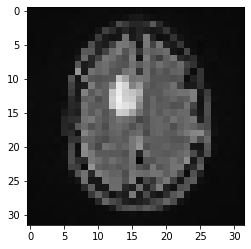

In [417]:
plt.imshow(test_x[0])

In [418]:
test_y[0]

1.0

In [419]:
if pred[0]>=0.99:
    print('Patient is diagnosed with brain tumor')
else:
    print('Patient is safe from brain tumor')

Patient is diagnosed with brain tumor
